In [1]:
%pip install keras==2.15.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras==2.15.0 (from versions: none)
ERROR: No matching distribution found for keras==2.15.0


In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import keras
keras.__version__

'3.2.1'

In [14]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------ --------------------------------- 51.2/294.9 kB 2.7 MB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.9 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
%pip install scikit-learn


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 1.5 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.6 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.3/10.6 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.6 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.6 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.6 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/10.6 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/10.6 MB 1.6 MB/s eta 0:00:07
   --- ----

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [6]:
import os
print(os.listdir("C://Users//Riddhi//Desktop//IO Project//images2"))

['apple_pie', 'baby_back_ribs', 'baklava']


In [7]:
values=['apple_pie', 'baby_back_ribs', 'baklava']
values.sort()
values = values[0:]
print(values)

['apple_pie', 'baby_back_ribs', 'baklava']


In [8]:
print("Number of classes:",len(values))

Number of classes: 3


In [9]:
s = """Apple Pie: ~2.5 calories per gram
Baby Back Ribs: ~3.5 calories per gram
Baklava: ~5 calories per gram
Beef Carpaccio: ~2 calories per gram
Beef Tartare: ~2.5 calories per gram
Beet Salad: ~0.5 calories per gram
Beignets: ~3.5 calories per gram
Bibimbap: ~1.5 calories per gram
Bread Pudding: ~2.5 calories per gram
Breakfast Burrito: ~2 calories per gram
Bruschetta: ~1 calorie per gram
Caesar Salad: ~0.5 calories per gram
Cannoli: ~3.5 calories per gram
Caprese Salad: ~1 calorie per gram
Carrot Cake: ~3.5 calories per gram
Ceviche: ~0.5 calories per gram
Cheese Plate: ~3.5 calories per gram
Cheesecake: ~3.5 calories per gram
Chicken Curry: ~1.5 calories per gram
Chicken Quesadilla: ~2.5 calories per gram
Chicken Wings: ~3 calories per gram
Chocolate Cake: ~4 calories per gram
Chocolate Mousse: ~3 calories per gram
Churros: ~4 calories per gram
Clam Chowder: ~1.5 calories per gram
Club Sandwich: ~2.5 calories per gram
Crab Cakes: ~2 calories per gram
Creme Brulee: ~3.5 calories per gram
Croque Madame: ~3 calories per gram
Cupcakes: ~3.5 calories per gram
Deviled Eggs: ~1 calorie per gram
Donuts: ~4 calories per gram
Dumplings: ~2.5 calories per gram
Edamame: ~1 calorie per gram
Eggs Benedict: ~2.5 calories per gram
Escargots: ~1 calorie per gram
Falafel: ~2 calories per gram
Filet Mignon: ~2.5 calories per gram
Fish and Chips: ~2.5 calories per gram
Foie Gras: ~4.5 calories per gram
French Fries: ~3.5 calories per gram
French Onion Soup: ~1 calorie per gram
French Toast: ~2 calories per gram
Fried Calamari: ~2.5 calories per gram
Fried Rice: ~1.5 calories per gram
Frozen Yogurt: ~1 calorie per gram
Garlic Bread: ~4 calories per gram
Gnocchi: ~1.5 calories per gram
Greek Salad: ~0.5 calories per gram
Grilled Cheese Sandwich: ~3 calories per gram
Grilled Salmon: ~2 calories per gram
Guacamole: ~2 calories per gram
Gyoza: ~2 calories per gram
Hamburger: ~3.5 calories per gram
Hot and Sour Soup: ~0.5 calories per gram
Hot Dog: ~3.5 calories per gram
Huevos Rancheros: ~2 calories per gram
Hummus: ~1.5 calories per gram
Ice Cream: ~2 calories per gram
Lasagna: ~1.5 calories per gram
Lobster Bisque: ~1 calorie per gram
Lobster Roll Sandwich: ~2.5 calories per gram
Macaroni and Cheese: ~3 calories per gram
Macarons: ~4 calories per gram
Miso Soup: ~0.5 calories per gram
Mussels: ~0.5 calories per gram
Nachos: ~2.5 calories per gram
Omelette: ~1.5 calories per gram
Onion Rings: ~2.5 calories per gram
Oysters: ~0.5 calories per gram
Pad Thai: ~2 calories per gram
Paella: ~1.5 calories per gram
Pancakes: ~2 calories per gram
Panna Cotta: ~3.5 calories per gram
Peking Duck: ~4 calories per gram
Pho: ~1 calorie per gram
Pizza: ~2.5 calories per gram
Pork Chop: ~2.5 calories per gram
Poutine: ~2.5 calories per gram
Prime Rib: ~2.5 calories per gram
Pulled Pork Sandwich: ~2.5 calories per gram
Ramen: ~1 calorie per gram
Ravioli: ~1.5 calories per gram
Red Velvet Cake: ~4 calories per gram
Risotto: ~1.5 calories per gram
Samosa: ~2 calories per gram
Sashimi: ~1 calorie per gram
Scallops: ~1 calorie per gram
Seaweed Salad: ~0.5 calories per gram
Shrimp and Grits: ~2 calories per gram
Spaghetti Bolognese: ~1.5 calories per gram
Spaghetti Carbonara: ~2 calories per gram
Spring Rolls: ~1.5 calories per gram
Steak: ~2.5 calories per gram
Strawberry Shortcake: ~3.5 calories per gram
Sushi: ~1 calorie per gram
Tacos: ~2 calories per gram
Takoyaki: ~2.5 calories per gram
Tiramisu: ~3 calories per gram
Tuna Tartare: ~1.5 calories per gram
Waffles: ~2 calories per gram
"""
calories = s.splitlines()
s = "These values are approximations and can vary based on factors such as ingredients and cooking methods."

In [10]:
len(calories)

101

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)
train_data = train_datagen.flow_from_directory("C://Users//Riddhi//Desktop//IO Project//images2",
                                               target_size=(224,224),
                                               batch_size=64,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory("C://Users//Riddhi//Desktop//IO Project//images2",
                                               target_size=(224,224),
                                               batch_size=64,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

Found 1851 images belonging to 3 classes.
Found 204 images belonging to 3 classes.


In [11]:
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
new_input = Input(shape=(224, 224, 3))
base_model = DenseNet201(weights='imagenet', include_top=False, input_tensor=new_input)
# base_model.summary()

In [12]:
for layer in base_model.layers[:]:
  layer.trainable = False
# vgg16_model.summary()

In [13]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ ?                      │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

In [14]:
import tensorflow as tf
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [15]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
results = model.fit(train_data, epochs=50, validation_data=test_data,
                  steps_per_epoch=len(train_data)//64, validation_steps=len(test_data)//64,
                  callbacks = EarlyStopping(patience=5, monitor='val_accuracy',restore_best_weights=True))

Epoch 1/50


c:\Users\Riddhi\anaconda3\envs\test1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 788s 24s/step - accuracy: 0.5042 - loss: 3.2018 - val_accuracy: 0.8039 - val_loss: 0.5460
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1239s 43s/step - accuracy: 0.8097 - loss: 0.4957 - val_accuracy: 0.8235 - val_loss: 0.3786
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4220s 149s/step - accuracy: 0.8758 - loss: 0.3503 - val_accuracy: 0.8824 - val_loss: 0.2861
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2093s 73s/step - accuracy: 0.8747 - loss: 0.3326 - val_accuracy: 0.8824 - val_loss: 0.2585
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2367s 83s/step - accuracy: 0.8971 - loss: 0.2764 - val_accuracy: 0.9069 - val_loss: 0.2543
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6429s 228s/step - accuracy: 0.9014 - loss: 0.2666 - val_accuracy: 0.8971 - val_loss: 0.2736
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 673s 23s/step - accuracy: 0.8911 - loss: 0.2755 - val_accuracy: 0.8578 - val_loss: 0.3088
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 920s 31s/step - accuracy: 0.9094 - loss: 0.2200 - val_accuracy: 0.9118

In [17]:
loss , acc = model.evaluate(test_data)
print("Test accuracy:", round(acc,4)*100,'%', "\nLoss value:",loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 159s 38s/step - accuracy: 0.9082 - loss: 0.2089
Test accuracy: 90.2 % 
Loss value: 0.2333461344242096


In [18]:
results.history['val_accuracy']
results.history['val_loss']

[0.5459936261177063,
 0.37858718633651733,
 0.28613796830177307,
 0.2585271894931793,
 0.2542749047279358,
 0.27356040477752686,
 0.3088282644748688,
 0.21509763598442078,
 0.23503939807415009,
 0.2849012017250061,
 0.24102358520030975,
 0.28332507610321045,
 0.25357359647750854,
 0.20101603865623474]

In [20]:
i = results.history['val_loss'].index(0.2849012017250061)
i
results.history['val_accuracy'][i]

0.8921568393707275

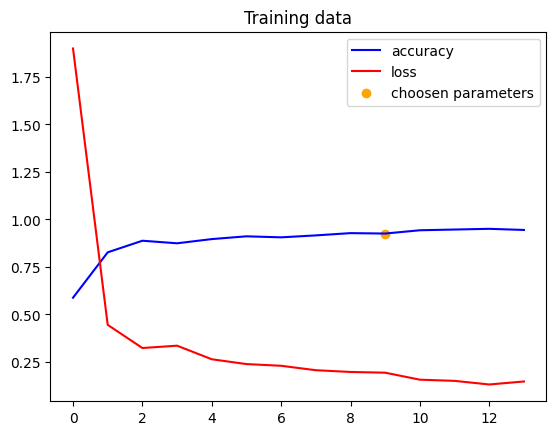

In [21]:
fig = plt.figure()
plt.plot(results.history['accuracy'], c='blue', label='accuracy')
plt.plot(results.history['loss'], c='red', label='loss')
plt.scatter(i,results.history['accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Training data')
plt.legend(loc='upper right')
plt.show()

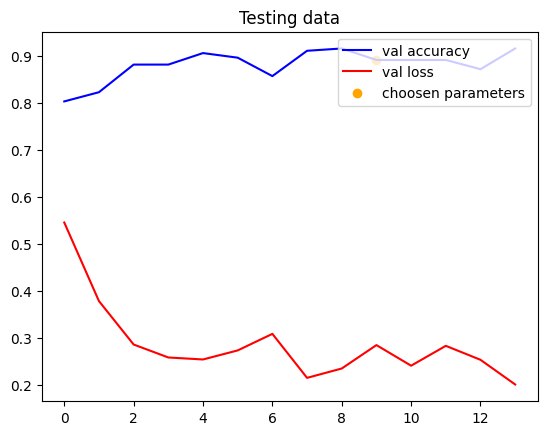

In [22]:
fig = plt.figure()
plt.plot(results.history['val_accuracy'], c='blue', label='val accuracy')
plt.plot(results.history['val_loss'], c='red', label='val loss')
plt.scatter(i,results.history['val_accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Testing data')
plt.legend(loc='upper right')
plt.show()

In [23]:
from tensorflow.keras.utils import plot_model
# plot the model
plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [28]:
import tensorflow as tf

# Delete the existing dataset
tf.keras.backend.clear_session()

# Create a new dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "C://Users//Riddhi//Desktop//IO Project//images2",
    image_size=(224, 224),
    batch_size=64,
    label_mode="categorical",
    shuffle=True,
    subset="training",
    validation_split=0.1,
    seed=42,
    interpolation="bilinear"
)

Found 2055 files belonging to 3 classes.
Using 1850 files for training.


In [29]:
model.save("io_model.h5")

ValueError: Unable to synchronously create dataset (name already exists)

In [30]:
import pickle

filename = 'io_model2.pkl'
pickle.dump(model,(filename,'wb'))

TypeError: file must have a 'write' attribute

In [24]:
print(os.listdir("C://Users//Riddhi//Desktop//IO Project//images"))

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

Apple pie Sample


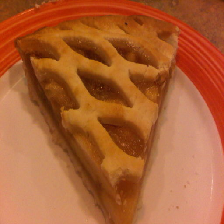

In [54]:
print("Apple pie Sample")
apple_pie = load_img("C://Users//Riddhi//Desktop//IO Project//images//apple_pie//136256.jpg",target_size=(224,224,3))
apple_pie

Baby Back Ribs Sample


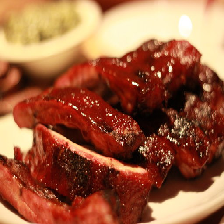

In [55]:
print("Baby Back Ribs Sample")
baby_back_ribs = load_img("C://Users//Riddhi//Desktop//IO Project//images2//baby_back_ribs//2432.jpg",target_size=(224,224,3))
baby_back_ribs

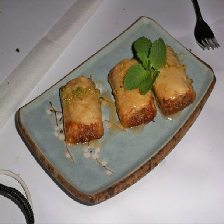

In [56]:
baklava2 = load_img("C://Users//Riddhi//Desktop//IO Project//images2//baklava//1784.jpg",target_size=(224,224,3))
baklava2

Baklava Sample


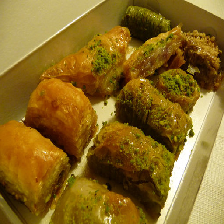

In [57]:
print("Baklava Sample")
baklava = load_img("C://Users//Riddhi//Desktop//IO Project//images2//baklava//788.jpg",target_size=(224,224,3))
baklava

Text(0.5, 1.0, 'Baklava')

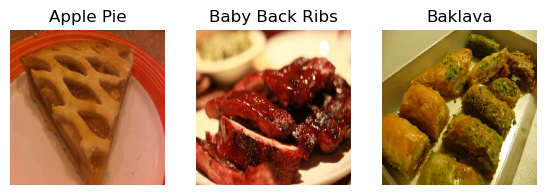

In [58]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 6, 1)
plt.axis('off')
plt.imshow(apple_pie)
plt.title("Apple Pie")
# _____________________________________________
fig.add_subplot(1, 6, 2)
plt.axis('off')
plt.imshow(baby_back_ribs)
plt.title("Baby Back Ribs")
# _____________________________________________
fig.add_subplot(1, 6, 3)
plt.axis('off')
plt.imshow(baklava)
plt.title("Baklava")

In [59]:
apple_pie = img_to_array(apple_pie)
baklava = img_to_array(baklava)
baby_back_ribs = img_to_array(baby_back_ribs)
baklava2 = img_to_array(baklava2)

apple_pie = apple_pie/255
baklava = baklava/255
baby_back_ribs = baby_back_ribs/255
baklava2 = baklava2/225

apple_pie = apple_pie.reshape(1,224,224,3)
baklava = baklava.reshape(1,224,224,3)
baby_back_ribs = baby_back_ribs.reshape(1,224,224,3)
baklava2 = baklava2.reshape(1,224,224,3)

apple_pie.shape

(1, 224, 224, 3)

In [16]:
p1 = (model.predict(apple_pie)).argmax()

print("Class ",p1,": ",values[p1],sep='')
print(calories[p1],'\nNote:',s)

NameError: name 'apple_pie' is not defined

In [61]:
p2 = (model.predict(baklava)).argmax()

print("Class ",p2,": ",values[p2],sep='')
print(calories[p2],'\nNote:',s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Class 2: baklava
Baklava: ~5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [62]:
p2 = (model.predict(baby_back_ribs)).argmax()

print("Class ",p2,": ",values[p2],sep='')
print(calories[p2],'\nNote:',s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Class 1: baby_back_ribs
Baby Back Ribs: ~3.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [63]:
p3 = (model.predict(baklava2)).argmax()

print("Class ",p3,": ",values[p3],sep='')
print(calories[p3],'\nNote:',s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
Class 2: baklava
Baklava: ~5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [1]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [16]:
print('-- Training set --\n')
print(f'Number of pictures: {train_data.image_shape[0]}\n')
print(f'Number of different labels: {len(train_data.Label.unique())}\n')
print(f'Labels: {train_data.Label.unique()}')

-- Training set --

Number of pictures: 224



AttributeError: 'DirectoryIterator' object has no attribute 'Label'